参考ページ → https://qiita.com/skotaro/items/01d66a8c9902a766a2c0 を参考にして、カラーバーと高さの揃った等高線図を描く方法を模索する

In [9]:
import tilemapbase as tmb
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import itertools as it
tmb.init(create=True)
%matplotlib inline

## 描画に使う関数

In [2]:
def get_extent(center, width):
    lng, lat = center
    min_lat, min_lng = lat - width, lng - width
    max_lat, max_lng = lat + width, lng + width
    return tmb.Extent.from_lonlat(
        min_lng, max_lng,
        min_lat, max_lat
    )

In [3]:
def get_data(center, width, n=20):
    lng0, lat0 = center
    lats = np.linspace(lat0 - width, lat0 + width, n)
    lngs = np.linspace(lng0 - width, lng0 + width, n)
    mat = np.array([np.sqrt((x-lng0)**2 + (y-lat0)**2) for x, y in it.product(lngs, lats)]).reshape(n,n).T
    return lngs, lats, mat * 1000 * 30

In [4]:
def project(lngs, lats):
    xs = [tmb.project(lng, lats[0])[0] for lng in lngs]
    ys = [tmb.project(lngs[0], lat)[1] for lat in lats]
    return xs, ys

In [5]:
def get_cmap(name="jet", ran=(0, 120)):
    cmap = cm.get_cmap(name)
    norm = Normalize(*ran)
    mappable = ScalarMappable(cmap=cmap, norm=norm)    
    return cmap, norm, mappable

In [6]:
def make_grid(extent, n):
    xs = np.linspace(extent.xmin, extent.xmax, n)
    ys = np.linspace(extent.ymin, extent.ymax, n)
    return xs, ys

In [7]:
def make_xyz(extent, n):
    xs, ys = make_grid(extent, n)
    z = np.array([
        np.sqrt((x-xs[0])**2 + (y-ys[-1])**2) for x, y in it.product(xs, ys)        
    ]).reshape(n, n)
    
    return xs, ys, z

In [8]:
def get_cmap(name="jet", ran=(0, 100)):
    cmap = cm.get_cmap(name)
    norm = Normalize(*ran)
    mappable = ScalarMappable(cmap=cmap, norm=norm)    
    return cmap, norm, mappable

## 描画してみる

In [40]:
def doit(area):
    ## constants 
    n = 20

    ## colormap
    cmap, norm, mble = get_cmap()

    ## prepare plot
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    ## prepare grid, matrix
    extent = tmb.Extent.from_lonlat(*area)
    print(extent)
    xs, ys, z = make_xyz(extent, n)

    ## tilemapbase
    tile = tmb.tiles.build_OSM()
    plotter = tmb.Plotter(extent, tile, width=600)
    plotter.plot(ax, tile)

    ## contour, colorbar
    contour = ax.contourf(
        xs, ys, z, alpha=0.35, cmap=cmap
    )

    divider = make_axes_locatable(ax)    
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mble, cax=cax)
    ax.set_title("color bar sample")

    return fig, ax, extent

Extent((0.8876972222222222,0.39340717742603076)->(0.8886222222222222,0.39430460662617106) projected as normal)
0.0009249999999999536 0.0008974292001402984


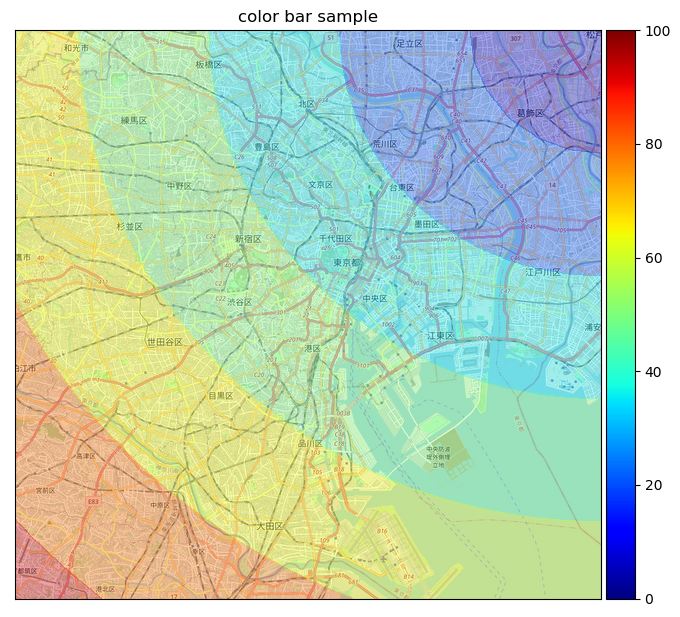

In [41]:
_, _, ex = doit((139.5710, 139.904, 35.5271, 35.7896))
print(ex.xmax - ex.xmin, ex.ymax - ex.ymin)

👆 地図とカラーバーの高さが揃った